<a href="https://colab.research.google.com/github/asif851/Bank-Customer-Churn-Prediction-Model/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#import csv file

url='/content/drive/MyDrive/Colab Notebooks/Bank_Customer_Churn/ Churn Modelling.csv'

df=pd.read_csv(url)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Analyze Each Feature**

In [3]:
#No. of rows and columns

df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


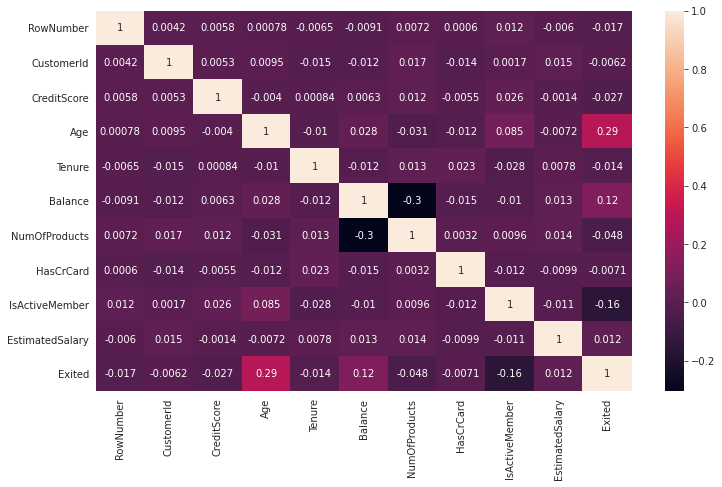

In [5]:
# correlation within features

plt.figure(figsize=(12,7))
corrMat=df.corr()
sns.heatmap(corrMat, annot=True)
plt.show()

**Geography**

In [6]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Geography')

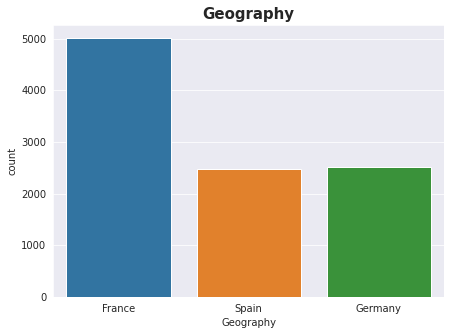

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(x='Geography',data=df).set_title("Geography",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

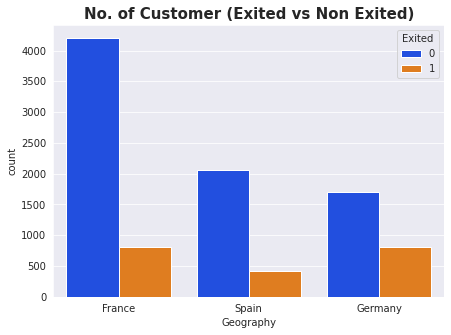

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(x="Geography",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Gender**

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender')

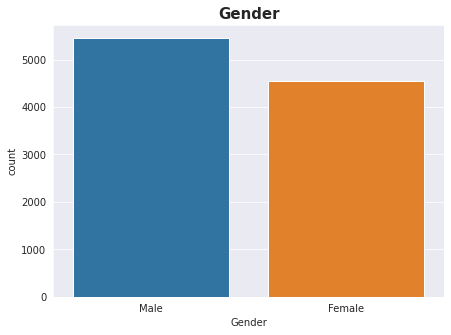

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',order=["Male","Female"],data=df).set_title("Gender",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

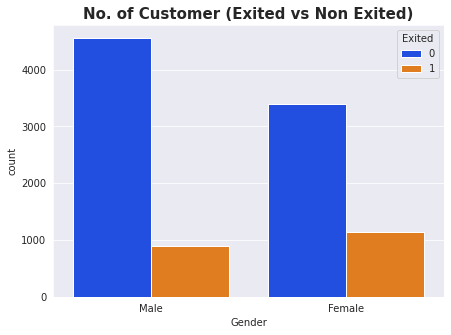

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x="Gender",hue="Exited",data=df,palette='bright',order=["Male","Female"]).set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Gender-Geography**

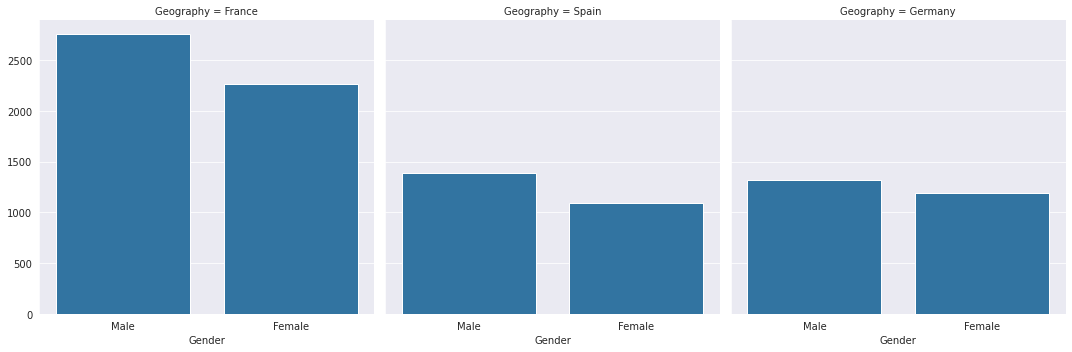

In [13]:
g = sns.FacetGrid(data=df, col="Geography", height=5, aspect=1)
g.map(sns.countplot, "Gender",  order=["Male", "Female"])

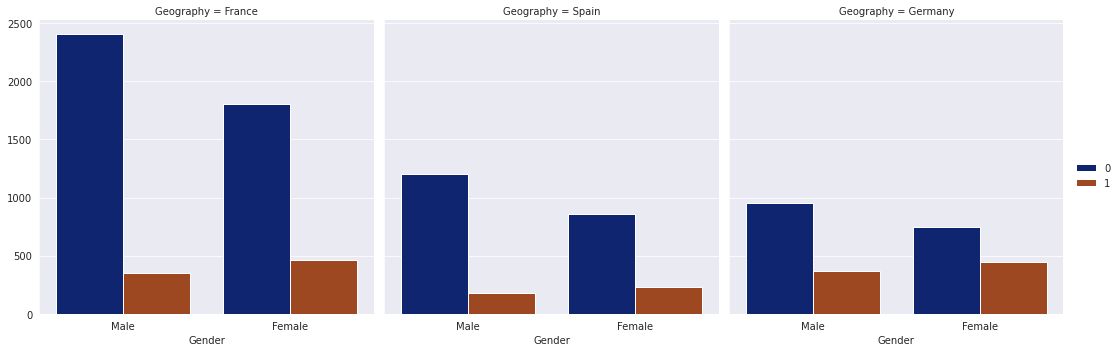

In [14]:
g = sns.FacetGrid(data=df, col="Geography", height=5, aspect=1)
g.map(sns.countplot, "Gender",hue="Exited" ,data=df,order=["Male", "Female"],palette="dark")
g.add_legend()  # 0 stands for Not Exited , 1 stands for Exited 

**Age**

In [15]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

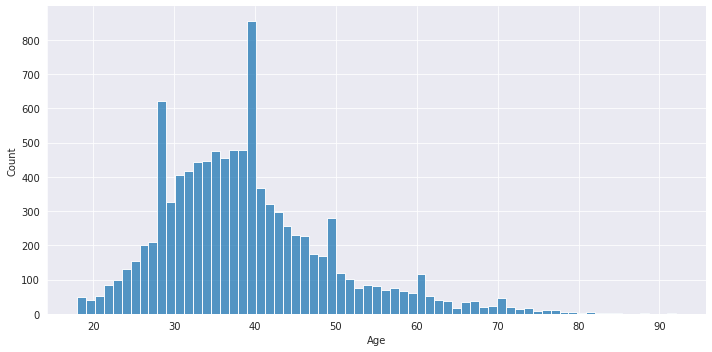

In [16]:
sns.displot(data=df, x="Age",height=5, aspect=2)

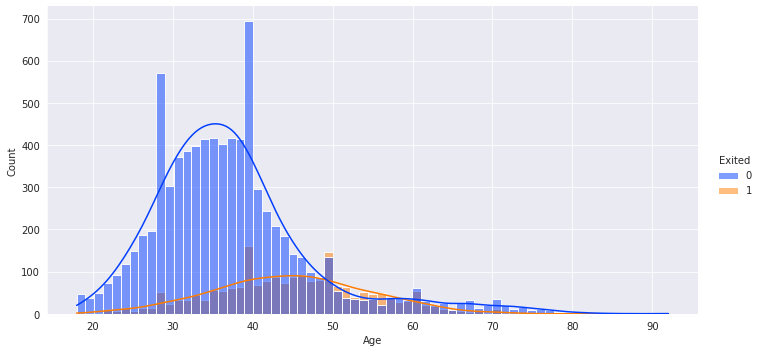

In [17]:
sns.displot(data=df, x="Age",hue="Exited",kind="hist",kde=True,palette="bright",height=5, aspect=2)

**No. of Product**

Text(0.5, 1.0, 'No. of Product')

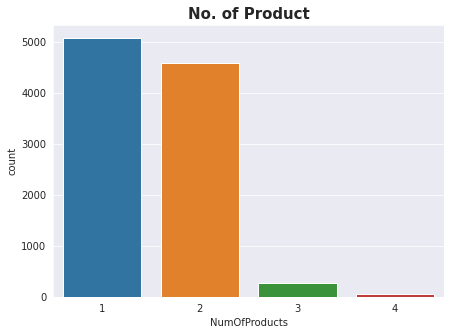

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x="NumOfProducts",data=df).set_title("No. of Product",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

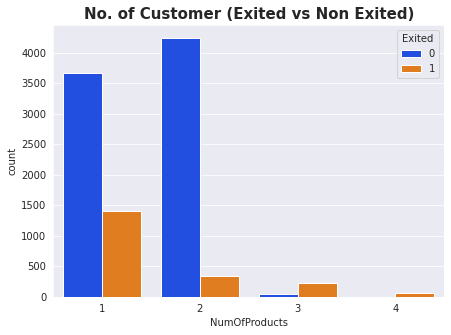

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x="NumOfProducts",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Tenure**

Text(0.5, 1.0, 'Tenure')

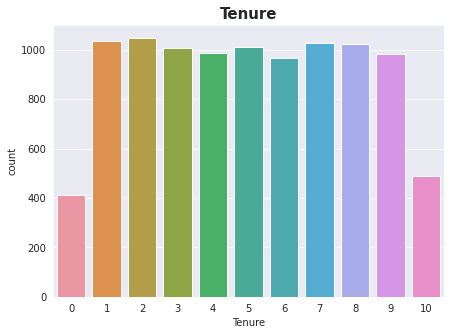

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x="Tenure",data=df).set_title("Tenure",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

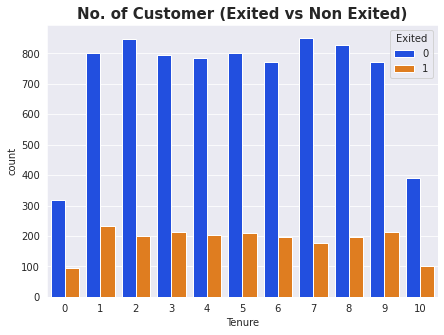

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x="Tenure",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Credit Card Holder**

Text(0.5, 1.0, 'No.of  Credit Card Holder')

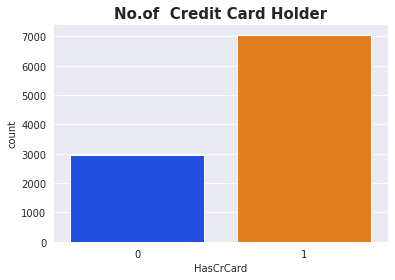

In [22]:
sns.countplot(x="HasCrCard",data=df,palette='bright').set_title("No.of  Credit Card Holder",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

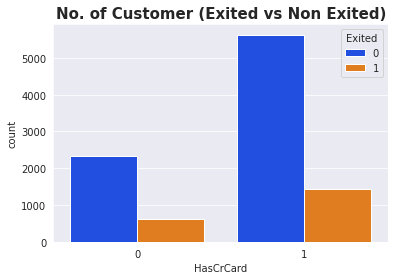

In [23]:
sns.countplot(x="HasCrCard",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Active Member**

Text(0.5, 1.0, 'ActiveMember')

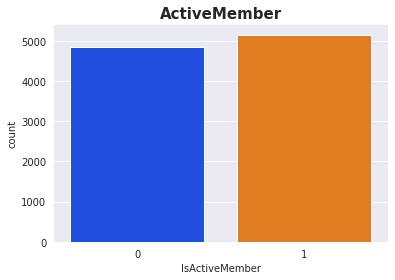

In [24]:
sns.countplot(x="IsActiveMember",data=df,palette='bright').set_title("ActiveMember",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

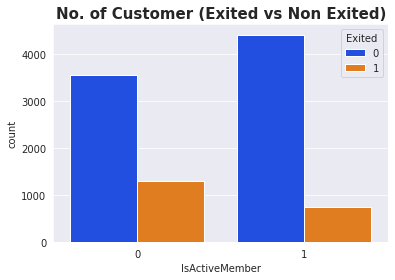

In [25]:
sns.countplot(x="IsActiveMember",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**CreditScore**

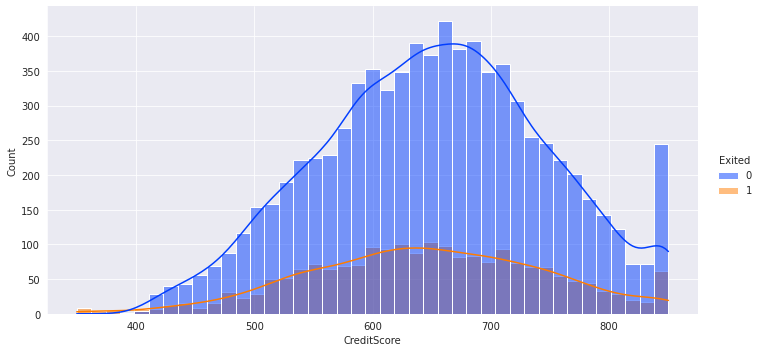

In [26]:

sns.displot(data=df, x="CreditScore",hue="Exited",palette="bright",kind="hist",kde=True,height=5, aspect=2)

**Balance**

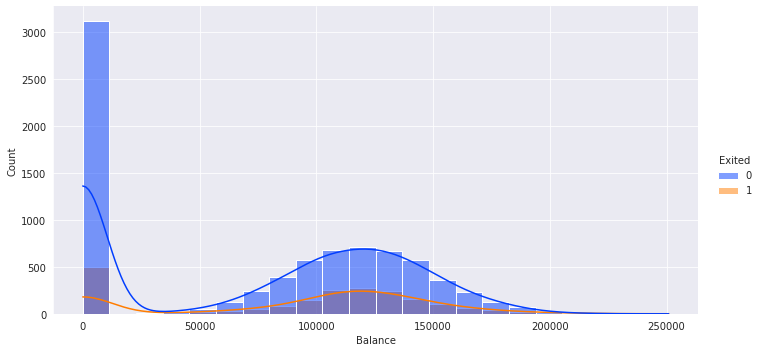

In [27]:
sns.displot(data=df, x="Balance",hue="Exited",kind="hist",kde=True,height=5, aspect=2,palette="bright")

**EstimatedSalary**

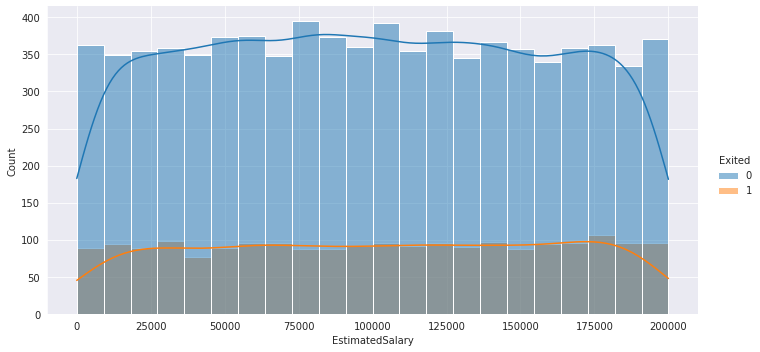

In [28]:
sns.displot(data=df, x="EstimatedSalary",hue="Exited",kind="hist",kde=True,height=5, aspect=2)

**Data Preprocessing**

In [29]:
# drop unnecessary feature

df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [30]:
df.shape

(10000, 11)

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
#Create dummy variables

geography=pd.get_dummies(df["Geography"],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [33]:
# Concatenate the Data Frames

df=pd.concat([df,geography,gender],axis=1)

# Drop Unnecessary columns
df=df.drop(['Geography','Gender'],axis=1)

In [34]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [35]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [36]:
# Dividing dependent and independent variables

X=df.drop('Exited',axis=1)
y=df['Exited']


In [37]:
# Sampling

from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X_res, y_res = sampler.fit_sample(X, y)

print('SMOTE {}'.format(Counter(y_res)))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


SMOTE Counter({1: 7963, 0: 7963})


In [38]:

# Splitting a dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [39]:

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# import modules to create model

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.layers import Dense, Activation,  Dropout
from keras.activations import relu, sigmoid

In [41]:
#Build Model

def build_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            
    model.add(Dense(1)) 
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=build_model, verbose=0)

In [42]:
#putting Parameters

layers = [(40, 20), (45, 30, 15), (60,40,25,10),(80,60,40,25,10)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [43]:
#fit train data
grid_result = grid.fit(X_train, y_train)


In [44]:
grid_result

GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7efe84be4e90>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['sigmoid', 'relu'],
                         'batch_size': [128, 256], 'epochs': [30],
                         'layers': [(40, 20), (45, 30, 15), (60, 40, 25, 10),
                                    (80, 60, 40, 25, 10)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
[grid_result.best_score_,grid_result.best_params_]

[0.8271943688392639,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': (80, 60, 40, 25, 10)}]

In [46]:
result=grid.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
y_pred=(result>0.5)

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
 
score=accuracy_score(y_test,y_pred) #Accuracy = TP+TN/TP+FP+FN+TN
print(f'Accuracy of the model is {score*100}%')  

Accuracy of the model is 83.6514314414867%


In [49]:
confusion_m=confusion_matrix(y_test,y_pred )
confusion_m

array([[1678,  358],
       [ 293, 1653]])

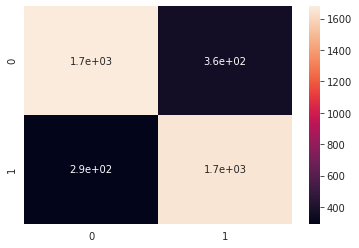

In [50]:
sns.heatmap(confusion_m, annot=True)

In [51]:
p_score=precision_score(y_test,y_pred)  #Precision = TP/TP+FP
re_score=recall_score(y_test,y_pred)    #Recall = TP/TP+FN
f_score=f1_score(y_test,y_pred)         #F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

precision score of the model is 0.8219791148682247
recall score of the model is 0.8494347379239465
f1_score of the model is 0.8354814253222137
